In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
print("pd", pd.__version__)
print("alt", alt.__version__)
# alt.data_transformers.disable_max_rows()

alt.data_transformers.enable('data_server')
# alt.data_transformers.enable('json')
# alt.renderers.enable('default')
from altair_saver import save
# alt.renderers.enable('altair_saver', fmts=['vega-lite', 'png']);
import warnings
warnings.filterwarnings("ignore")


pd 1.1.3
alt 4.1.0


[*********************100%***********************]  9 of 9 completed


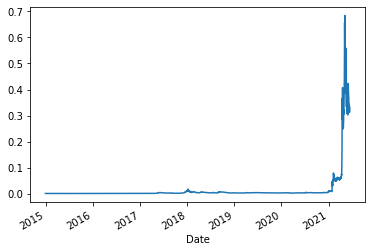

In [17]:
import yfinance as yf  
import matplotlib.pyplot as plt
# # Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
tickers = ['BTC-USD','ETH-USD', 'DOGE-USD', 'ADA-USD', 'XRP-USD', 'USDT-USD', 'LTC-USD', 'LINK-USD', 'ICP1-USD']
data = yf.download(tickers,'2015-01-01','2021-06-15')
# # Plot the close prices
data["Adj Close"]['DOGE-USD'].plot()
plt.show()

In [18]:
data

Adj Close                                                  \
             ADA-USD       BTC-USD  DOGE-USD      ETH-USD   ICP1-USD   
Date                                                                   
2014-12-31       NaN    320.192993  0.000187          NaN        NaN   
2015-01-01       NaN    314.248993  0.000183          NaN        NaN   
2015-01-02       NaN    315.032013  0.000186          NaN        NaN   
2015-01-03       NaN    281.082001  0.000167          NaN        NaN   
2015-01-04       NaN    264.195007  0.000158          NaN        NaN   
...              ...           ...       ...          ...        ...   
2021-06-10  1.531857  36702.597656  0.326351  2471.518555  66.590591   
2021-06-11  1.436378  37334.398438  0.319359  2353.768799  58.237911   
2021-06-12  1.480220  35552.515625  0.312084  2372.484375  61.205273   
2021-06-13  1.558359  39097.859375  0.324382  2508.391602  64.568047   
2021-06-14  1.575110  40218.476562  0.332085  2537.891113  66.031654   

                                                          Close  ...  \
             LINK-USD     LTC-USD  USDT-USD   XRP-USD   ADA-USD  ...   
Date                                                             ...   
2014-12-31        NaN    2.718930       NaN  0.024438       NaN  ...   
2015-01-01        NaN    2.699050       NaN  0.024390       NaN  ...   
2015-01-02        NaN    2.667360       NaN  0.024318       NaN  ...   
2015-01-03        NaN    2.133160       NaN  0.022106       NaN  ...   
2015-01-04        NaN    1.956680       NaN  0.018928       NaN  ...   
...               ...         ...       ...       ...       ...  ...   
2021-06-10  23.100679  168.203064  1.000738  0.869182  1.531857  ...   
2021-06-11  21.478968  162.880524  1.000511  0.848450  1.436378  ...   
2021-06-12  21.686546  162.014862  1.001140  0.832683  1.480220  ...   
2021-06-13  23.337601  170.930878  0.999733  0.883160  1.558359  ...   
2021-06-14  23.860899  172.949097  1.000626  0.892897  1.575110  ...   

                Open        Volume                                         \
             XRP-USD       ADA-USD      BTC-USD    DOGE-USD       ETH-USD   
Date                                                                        
2014-12-31  0.024194           NaN     13942900      314633           NaN   
2015-01-01  0.024455           NaN      8036550      306913           NaN   
2015-01-02  0.024377           NaN      7860650      356017           NaN   
2015-01-03  0.024297           NaN     33054400      285574           NaN   
2015-01-04  0.022100           NaN     55629100      379150           NaN   
...              ...           ...          ...         ...           ...   
2021-06-10  0.921324  2.366588e+09  43576032854  2114010549  2.875363e+10   
2021-06-11  0.869247  2.477032e+09  38699736985  1834446577  2.483256e+10   
2021-06-12  0.847879  2.801038e+09  37924228550  1605633791  2.572436e+10   
2021-06-13  0.833252  2.785909e+09  40669112838  1484851447  2.709295e+10   
2021-06-14  0.883048  2.543903e+09  43148914673  1613812023  2.696458e+10   

                                                                             
               ICP1-USD      LINK-USD     LTC-USD      USDT-USD     XRP-USD  
Date                                                                         
2014-12-31          NaN           NaN     1577550           NaN      640940  
2015-01-01          NaN           NaN      770693           NaN      399022  
2015-01-02          NaN           NaN      855392           NaN      459956  
2015-01-03          NaN           NaN     5193080           NaN     2171040  
2015-01-04          NaN           NaN     3888140           NaN     3801010  
...                 ...           ...         ...           ...         ...  
2021-06-10  373290838.0  1.193160e+09  2639779895  7.270603e+10  3157272780  
2021-06-11  359113044.0  1.088966e+09  2518234370  6.223305e+10  2502880892  
2021-06-12  354115890.0  1.247246e+09  2207409008  6.202

In [19]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [20]:
df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [21]:
df.set_index('Date', inplace = True)

In [22]:
df = df.rename(columns = {'Adj Close':'Adj_Close'})

In [23]:
df

,Symbol,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-10-01,ADA-USD,0.024969,0.024969,0.032226,0.017354,0.021678,5.006870e+07
2017-10-02,ADA-USD,0.025932,0.025932,0.030088,0.019969,0.024607,5.764130e+07
2017-10-03,ADA-USD,0.020816,0.020816,0.027425,0.020690,0.025757,1.699780e+07
2017-10-04,ADA-USD,0.021931,0.021931,0.022806,0.020864,0.020864,9.000050e+06
2017-10-05,ADA-USD,0.021489,0.021489,0.022154,0.020859,0.021951,5.562510e+06
...,...,...,...,...,...,...,...
2021-06-10,XRP-USD,0.869182,0.869182,0.927827,0.853797,0.921324,3.157273e+09
2021-06-11,XRP-USD,0.848450,0.848450,0.879191,0.835943,0.869247,2.502881e+09
2021-06-12,XRP-USD,0.832683,0.832683,0.847879,0.807698,0.847879,2.731548e+09


<AxesSubplot:xlabel='Date'>

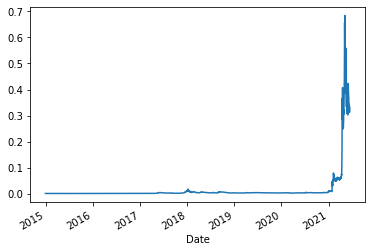

In [24]:
df[df.Symbol == 'DOGE-USD']['Close'].plot()

In [25]:
df.reset_index(inplace = True)

In [26]:
df

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume
0,2017-10-01,ADA-USD,0.024969,0.024969,0.032226,0.017354,0.021678,5.006870e+07
1,2017-10-02,ADA-USD,0.025932,0.025932,0.030088,0.019969,0.024607,5.764130e+07
2,2017-10-03,ADA-USD,0.020816,0.020816,0.027425,0.020690,0.025757,1.699780e+07
3,2017-10-04,ADA-USD,0.021931,0.021931,0.022806,0.020864,0.020864,9.000050e+06
4,2017-10-05,ADA-USD,0.021489,0.021489,0.022154,0.020859,0.021951,5.562510e+06
...,...,...,...,...,...,...,...,...
16575,2021-06-10,XRP-USD,0.869182,0.869182,0.927827,0.853797,0.921324,3.157273e+09
16576,2021-06-11,XRP-USD,0.848450,0.848450,0.879191,0.835943,0.869247,2.502881e+09
16577,2021-06-12,XRP-USD,0.832683,0.832683,0.847879,0.807698,0.847879,2.731548e+09
16578,2021-06-13,XRP-USD,0.883160,0.883160,0.888077,0.819273,0.833252,3.059837e+09


In [27]:
# loop through the ticker to calculate the Moving Average for each ticker
def calculate_moving_average(days):
    data = []
    for ticker in tickers:
        ma50 = df.groupby('Symbol').get_group(ticker)["Close"].rolling(days).mean()
        data.append(ma50)
    return pd.concat(data)

In [28]:
df["MA50"] = calculate_moving_average(50)

In [29]:
df["MA100"] = calculate_moving_average(100)

In [30]:
df["MA200"] = calculate_moving_average(200)

In [31]:
def wwma(values, n):
    """Source: Investopedia - exponential weighted (EW) functions"""
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    """This function calculate ATR
    Average True Range (ATR) is the average of true ranges over the specified period.
    ATR measures volatility, taking into account any gaps in the price movement. 
    Typically, the ATR calculation is based on 14 periods, which can be intraday, 
    daily, weekly, or monthly.
    """
    data = df.copy()
    high = data["High"]
    low = data["Low"]
    close = data["Close"]
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    # return the dfmini, not the whole dataset, it will take years to load
    atr = wwma(tr, n)
    return atr

In [32]:
# loop through the ticker to calculate ATR value
data = []
for ticker in tickers:
    ATR = atr(df.groupby('Symbol').get_group(ticker), n=14)
    data.append(ATR)
df["ATR"] = pd.concat(data)

In [33]:
# loop through the ticker to calculate the 10 days returns
data = []
for ticker in tickers:
    dayX10_returns = df.groupby('Symbol').get_group(ticker)["Close"].pct_change(10)
    data.append(dayX10_returns)
df["Returns"] = pd.concat(data)

In [34]:
# loop through the ticker to calculate the daily range
data = []
for ticker in tickers:
    daily_range = df.groupby('Symbol').get_group(ticker)["High"]-df.groupby('Symbol').get_group(ticker)["Low"]
    data.append(daily_range)
df["Daily_Range"] = pd.concat(data)


<AxesSubplot:>

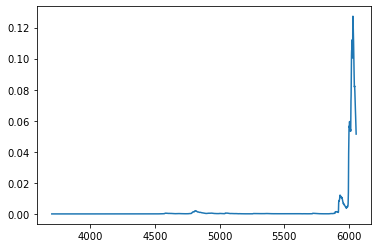

In [35]:
df.groupby('Symbol').get_group('DOGE-USD')['ATR'].plot()

In [36]:
#run once to store the dataset and comment out yfinance to avoid repeat pulling data from API
df.to_csv('AltCoinDataSet2021-06-20.csv', index = False)

In [ ]:
df = pd.read_csv('PrimeDataSet2021-06-18.csv')

In [37]:

pchart = alt.Chart(df).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC Price Trend Comparison with Other Cryptocurrencies')

pchart    

alt.Chart(...)

In [53]:
exchart = alt.Chart(df[df.Symbol.isin(tickers)]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC-USD Price VS Other Cryptocurrencies')

  

In [54]:
zone = pd.DataFrame([
    {
        "start": "2020-02-15",
        "end": "2020-03-16",
        "event": "Market-Dip"
    },
    
])

In [55]:
ruler = alt.Chart(zone).mark_rule(
    color="lightred",
    strokeWidth=40,
    opacity = 0.8
).encode(
    x= alt.X('start:T', title = 'Date'),
    #x2 = alt.X2('end:T'),
).transform_filter(alt.datum.event == "Market-Dip")

In [56]:
ruler + exchart

alt.LayerChart(...)

In [52]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','DOGE-USD'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and DOGE-USD Returns by Date Overlaid')


alt.Chart(...)

In [51]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('Daily_Range:Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Daily Range Fluctuation Comparison with Other Cryptocurrencies')
  

alt.Chart(...)

In [50]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('sum(Returns):Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Returns Comparison with Other Cryptocurrencies')
  

alt.Chart(...)

In [49]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('mean(ATR):Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Mean ATR Comparison with Other Cryptocurrencies')
  

alt.Chart(...)

In [65]:
alt.Chart(df[df.Symbol.isin(tickers)]).mark_boxplot(size=50, extent = 0.5).encode(
    x = alt.X('Symbol:N'),
#     y = alt.Y('month(Date):O'),
    y = alt.Y('Returns:Q'),
    color = alt.Color('Symbol:N')
).properties(title = 'BTC Returns VS Other Cryptocurrencies Borplot', width = 700).configure_axisX(labelFontSize = 12, labelAngle = 45)


alt.Chart(...)

In [58]:
alt.Chart(df[df.Symbol.isin(tickers)]).mark_circle().encode(
    x = alt.X('ATR:Q'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N'  
).properties(width = 700, title='BTC VS Other Cryptocurrencies (In Terms of Return VS Volatility)')

alt.Chart(...)

In [60]:
corrMatrix = df.corr()

In [61]:
mdata = pd.DataFrame()
mdata['BTC-USD'] = df.groupby('Symbol').get_group('BTC-USD')['Close'].reset_index(drop=True)
for tick in tickers:
    if tick != 'BTC-USD':
        tickdata = pd.DataFrame(df.groupby('Symbol', axis=0).get_group(tick)['Close'].reset_index(drop=True)).rename(columns = {'Close': tick})
        mdata = pd.concat([mdata, tickdata], axis=1, join='inner')

In [62]:
mdata

,BTC-USD,ETH-USD,DOGE-USD,ADA-USD,XRP-USD,USDT-USD,LTC-USD,LINK-USD,ICP1-USD
0,320.192993,2.772120,0.000187,0.024969,0.024438,1.211100,2.71893,0.189165,124.280617
1,314.248993,0.753325,0.000183,0.025932,0.024390,1.205740,2.69905,0.169680,165.561829
2,315.032013,0.701897,0.000186,0.020816,0.024318,0.606502,2.66736,0.150503,146.152527
3,281.082001,0.708448,0.000167,0.021931,0.022106,0.606229,2.13316,0.131129,145.952866
4,264.195007,1.067860,0.000158,0.021489,0.018928,1.000000,1.95668,0.170278,144.611465
5,274.473999,1.217440,0.000161,0.018539,0.020316,1.000000,2.08218,0.182198,148.159531
6,286.188995,1.827670,0.000168,0.020941,0.020732,1.000000,2.11212,0.194958,134.037247
7,294.337006,1.827870,0.000173,0.020477,0.020843,1.000000,2.11818,0.194586,143.419464
8,283.348999,1.688900,0.000168,0.022114,0.020676,1.000000,2.00807,0.243795,130.805328
9,290.407990,1.566030,0.000171,0.021531,0.020576,1.000000,1.98336,0.308440,115.765274


In [63]:
cor_data = mdata.corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})

cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)

In [64]:
base = alt.Chart(cor_data).encode(
    x= alt.X('variable2:O', title = 'Tickers'),
    y=alt.Y('variable:O', title = 'Tickers')    
)

# Text layer with correlation labels
# Use colors that are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(height = 600, width = 600, title = "BTC Heatmap")

cor_plot + text # overlay the text and rect layer

alt.LayerChart(...)